# Chapter 2. Vectors, Part 1

## Creating and Visualizing Vectors in NumPy

Dimentionality: $\reals^N$

$$
x = \begin{bmatrix}
   1 \\
   4 \\
   5 \\
   6
\end{bmatrix}
$$

$x$ is a 4D column vector, or $x \in \reals^4$

$$
z = \begin{bmatrix}
   1 & 4 & 5 & 6
\end{bmatrix}
$$

$z$ is a 4D row vector, or $x \in \reals^4$

Linear algebra convention is to assume that vectors are in column orientation unless otherwise specified. 

Row vectors are written as $w^T$, where the $^T$ indicates the transpose operation.

> The transpose operation transforms a column vector into a row vector.

In [1]:
import numpy as np

In [2]:
# Vectors in Python

asList  = [1,2,3] # orientationless array
asArray = np.array([1,2,3]) # 1D array
rowVec  = np.array([ [1,2,3] ]) # row
colVec  = np.array([ [1],[2],[3] ]) # column

In [4]:
# Dimensions are always listed as (rows,columns).

print(f'asList:  {np.shape(asList)}')
print(f'asArray: {asArray.shape}')
print(f'rowVec:  {rowVec.shape}')
print(f'colVec:  {colVec.shape}')

asList:  (3,)
asArray: (3,)
rowVec:  (1, 3)
colVec:  (3, 1)


## Operations on Vectors

### Adding Two Vectors

$$
\begin{bmatrix}
   4 \\
   5 \\
   6
\end{bmatrix}
+
\begin{bmatrix}
   10 \\
   20 \\
   30
\end{bmatrix}
=
\begin{bmatrix}
   14 \\
   25 \\
   36
\end{bmatrix}
$$

Vector addition is defined only for two vectors that have the same dimensionality.

**Subtracting two vectors**

$$
\begin{bmatrix}
   4 \\
   5 \\
   6
\end{bmatrix}
-
\begin{bmatrix}
   10 \\
   20 \\
   30
\end{bmatrix}
=
\begin{bmatrix}
   -6 \\
   -15 \\
   -24
\end{bmatrix}
$$


In [7]:
v = np.array([4,5,6])
w = np.array([10,20,30])
u = np.array([0,3,6,9])

In [12]:
v+w

array([14, 25, 36])

In [13]:
v-w

array([ -6, -15, -24])

In [10]:
u+w # error! dimensions mismatched!

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

**Can you add a row vector to a column vector?**

$$
\begin{bmatrix}
   4 \\
   5 \\
   6
\end{bmatrix}
+
\begin{bmatrix}
   10 & 20 & 30
\end{bmatrix}
= \text{?}
$$

In [15]:
v = np.array([[4,5,6]]).T # column vector
w = np.array([[10,20,30]]) # row vector
v+w

array([[14, 24, 34],
       [15, 25, 35],
       [16, 26, 36]])

> Two vectors can be added together only if they have the same dimensionality and the same orientation.

### Geometry of Vector Addition and Subtraction

To add two vectors geometrically, place the vectors such that the tail of one vector is at the head of the other vector. 

The summed vector traverses from the tail of the first vector to the head of the second.

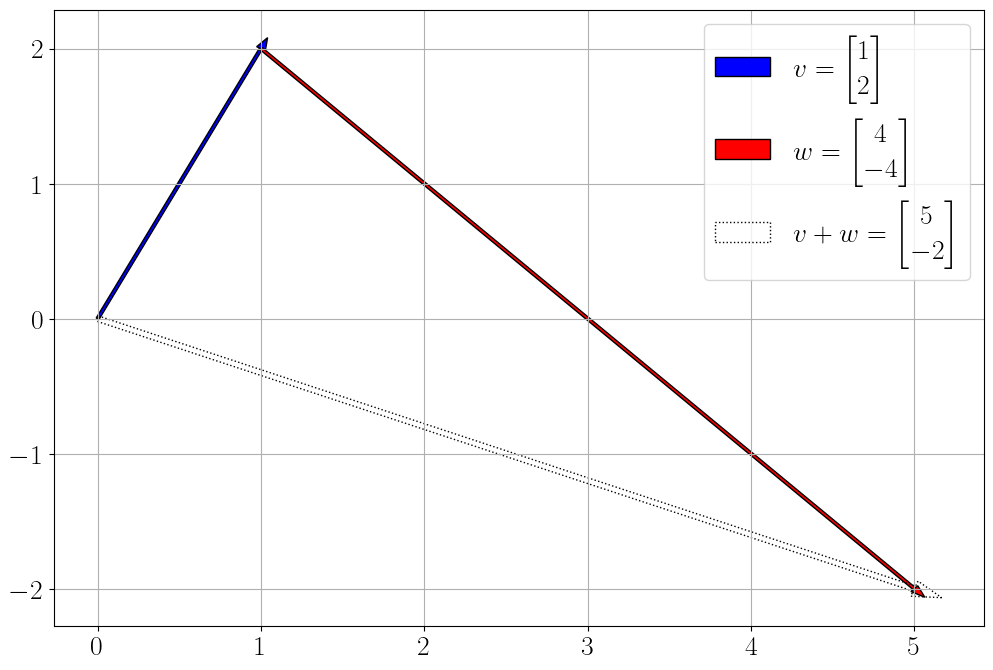

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 20
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

plt.rcParams["figure.figsize"] = [12, 8]

plt.arrow(0, 0, 1, 2, width = 0.02, fc = 'b', label = r'$v=\begin{bmatrix}1\\2\end{bmatrix}$')
plt.arrow(1, 2, 4, -4, width = 0.02, fc = 'r', label = r'$w=\begin{bmatrix}4\\-4\end{bmatrix}$')
plt.arrow(0, 0, 5, -2, width = 0.04, fc = 'g', ls = ':', fill = False, label = r'$v+w=\begin{bmatrix}5\\-2\end{bmatrix}$')
plt.legend()
plt.grid()

Subtracting vectors geometrically is slightly different but equally straightforward: line up the two vectors such that their tails are at the same coordinate (this is easily accomplished by having both vectors in standard position); the difference vector is the line that goes from the head of the “negative” vector to the head of the “positive” vector .

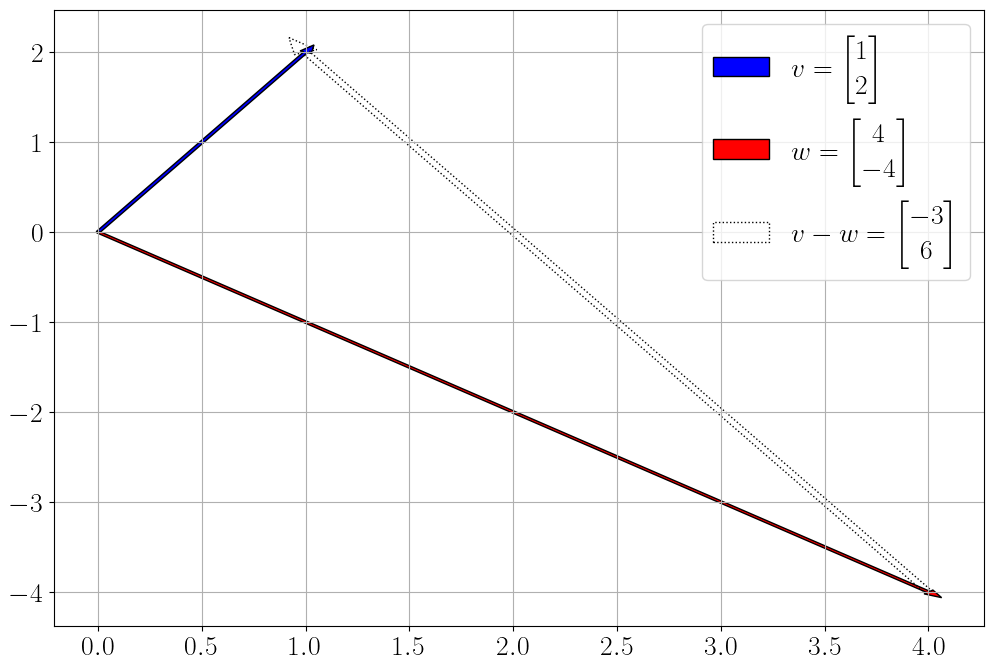

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 20
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

plt.rcParams["figure.figsize"] = [12, 8]

plt.arrow(0, 0, 1, 2, width = 0.02, fc = 'b', label = r'$v=\begin{bmatrix}1\\2\end{bmatrix}$')
plt.arrow(0, 0, 4, -4, width = 0.02, fc = 'r', label = r'$w=\begin{bmatrix}4\\-4\end{bmatrix}$')
plt.arrow(4, -4, -3, 6, width = 0.04, fc = 'g', ls = ':', fill = False, label = r'$v-w=\begin{bmatrix}-3\\6\end{bmatrix}$')
plt.legend()
plt.grid()

### Vector-Scalar Multiplication

Adding a scalar to a vector is not formally defined in linear algebra: they are two separate kinds of mathematical objects and cannot be combined.

However, numerical processing programs like Python will allow adding scalars to vectors, and the operation is comparable to scalar-vector multiplication: the scalar is added to each vector element. 

In [29]:
s = 2
v = np.array([3,6])
s+v

array([5, 8])

**The geometry of vector-scalar multiplication**

Why are scalars called “scalars”? 
That comes from the geometric interpretation. Scalars scale vectors without changing their direction.

There are four effects of vector-scalar multiplication that depend on whether the scalar is greater than 1, between 0 and 1, exactly 0, or negative. 

Vector-scalar multiplication in combination with vector addition leads directly to vector averaging. 

### Transpose

Transpose converts column vectors into row vectors, and vice versa.

A matrix has rows and columns; therefore, each matrix element has a (row,column) index. The transpose operation simply swaps those indices.

The transpose operation:

$$
m_{i,j}^T=m{j,i}
$$

Note that transposing twice returns the vector to its original orientation:

$$
m_{i,j}^{TT}=m{i,j}
$$

### Vector Broadcasting in Python

Broadcasting is an operation that exists only in modern computer-based linear algebra; this is not a procedure you would find in a traditional linear algebra textbook.

Broadcasting essentially means to repeat an operation multiple times between one vector and each element of another vector.

$$
\begin{bmatrix}
   1 \\
   2 \\
   3
\end{bmatrix}
+
\begin{bmatrix}
   10 & 20
\end{bmatrix}
= 
\begin{bmatrix}
   11 & 21 \\
   12 & 22 \\
   13 & 23
\end{bmatrix}
$$

In [31]:
v = np.array([[1,2,3]]).T # col vector
w = np.array([[10,20]])   # row vector
v + w # addition with broadcasting

array([[11, 21],
       [12, 22],
       [13, 23]])

In [33]:
w.T + v.T

array([[11, 12, 13],
       [21, 22, 23]])

Here again you can see the importance of orientation in linear algebra operations